# Import the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 # Computer Vision
import tensorflow as tf 
from PIL import Image # For reading image from folder
import os
os.chdir("D:\\Datascience\\Data science\\Practice\\Projects\\Traffic sign")
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model # Models
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout # Layers

In [2]:
data=[] 
labels=[]
classes=43
cur_path=os.getcwd()

In [3]:
for i in range(classes):
    path=os.path.join(cur_path,'Train',str(i))    
    images=os.listdir(path)
    for a in images:
        try:
            image= Image.open(path + '\\' + a)
            image= image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [4]:
data= np.array(data) # Array of images
labels=np.array(lables) # Array of different file classes

In [5]:
print(data.shape,lables.shape)

(39209, 30, 30, 3) (39209,)


### Split the training and testting data

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=0)

### Performing One-Hot encodind on Test data

In [7]:
# Scaling the pixel array 
X_train= X_train/255
X_test=X_test/255

y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

# Modeling

In [8]:
model=Sequential()

# CNN layers --- Filtering
model.add(Conv2D(filters=32,kernel_size=5,activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=5,activation='relu'))

# Maxpooling
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(rate=0.25))

# Filtering
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))

# Maxpooling
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(rate=0.25))

# Flattening
model.add(Flatten())

# Eatablishing Full Connection
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.25))

# Output layer
model.add(Dense(43,activation='softmax'))

# Model summury
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         73856     
                                                        

In [9]:
# Compilation of the Model
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [10]:
# Fit on train data
pred=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25)

Epoch 1/25
981/981 [==============================] - 111s 112ms/step - loss: 0.8436 - accuracy: 0.7630 - val_loss: 0.1028 - val_accuracy: 0.9727
Epoch 2/25
981/981 [==============================] - 108s 110ms/step - loss: 0.1234 - accuracy: 0.9627 - val_loss: 0.0684 - val_accuracy: 0.9801
Epoch 3/25
981/981 [==============================] - 108s 110ms/step - loss: 0.0764 - accuracy: 0.9762 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 4/25
981/981 [==============================] - 108s 111ms/step - loss: 0.0628 - accuracy: 0.9809 - val_loss: 0.0434 - val_accuracy: 0.9889
Epoch 5/25
981/981 [==============================] - 108s 110ms/step - loss: 0.0549 - accuracy: 0.9830 - val_loss: 0.0289 - val_accuracy: 0.9930
Epoch 6/25
981/981 [==============================] - 108s 110ms/step - loss: 0.0518 - accuracy: 0.9839 - val_loss: 0.0278 - val_accuracy: 0.9938
Epoch 7/25
981/981 [==============================] - 108s 110ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0286 -

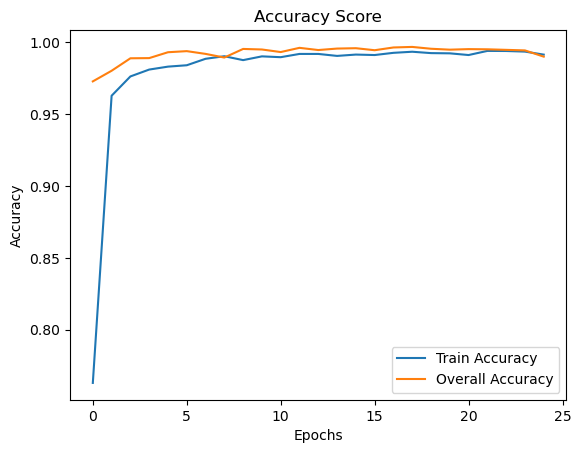

In [11]:
# Accuracy of model
plt.plot(pred.history['accuracy'],label='Train Accuracy')
plt.plot(pred.history['val_accuracy'],label='Overall Accuracy')
plt.title("Accuracy Score")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

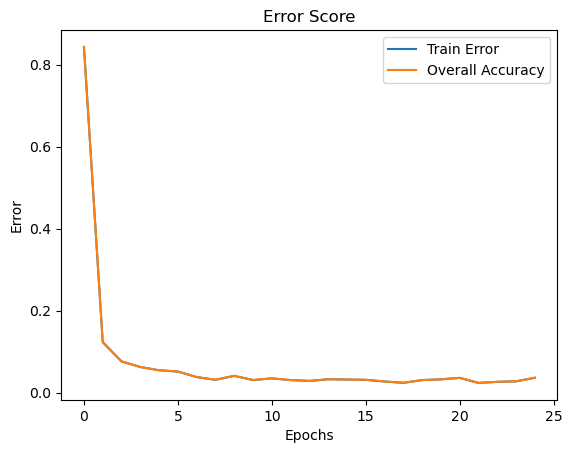

In [12]:
# Loss of model
plt.plot(pred.history['loss'],label='Train Error')
plt.plot(pred.history['loss'],label='Overall Accuracy')
plt.title("Error Score")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [19]:
def testing(testcsv):
    y_test=pd.read_csv(testcsv)
    lebel= y_test['ClassId']
    img=y_test['Path']
    data=[]
    for i in img:
        image=Image.open(i)
        image=image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,lebel

In [20]:
X_test,lebel=testing("Test.csv")

In [36]:
# predict on test data
y_pred=np.argmax(model.predict(X_test),axis=1)
y_pred

395/395 [==============================] - 6s 15ms/step


array([16,  1, 38, ..., 41,  7, 10], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:",accuracy_score(lebel,y_pred))

Test Accuracy: 0.9501979414093429


In [38]:
# Save the model
model.save("GTS.keras")

In [8]:
import os
os.chdir("D:\\Datascience\\Data science\\Practice\\Projects\\Traffic sign")
from keras.models import load_model
model=load_model('GTS.keras')

In [9]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def input_data(img):
    data=[]
    image=Image.open(img)
    image=image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    y_pred=np.argmax(model.predict(X_test),axis=1)
    return image,y_pred

1/1 [==============================] - 0s 40ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted traffic sign is: Bumpy road


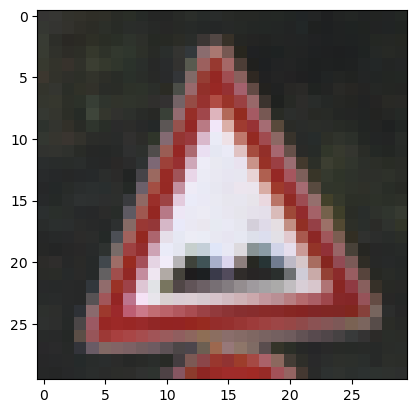

In [14]:
plot,prediction=input_data('Test\\00500.png')
s=[str(i) for i in prediction]
a=int(''.join(s))
print("Predicted traffic sign is:",classes.get(a))
plt.imshow(plot)
plt.show()